<a href="https://colab.research.google.com/github/Yuweien/Python-Workshop/blob/main/%5BCode_Template_Version%5D_of_Python_Workshop_for_Beginners_2_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ‧₊˚✩ ₊˚💻⊹♡ ✨ **Python for Absolute Beginners** ✨ ‧₊˚✩ ₊˚💻⊹♡


---

# **Session 2: A Hands-on Workflow**

---

**Instructor:** Yuwei Wang  
**Contact:** wangyw@arizona.edu  

Feel free to reach out if you have questions after the workshop.


---

# 👋 Welcome! 📄➡️📂 Please make a copy of this notebook

🔗 The link is in the Zoom chat.

👤 Please log in to your Google account first.  
Click **“Open in Google Colab”** in the top-right corner of the page.

🚀 Then go to **File → Save a copy in Drive**  
This will create your own editable copy for today’s workshop.

## 📣 Preparation before we start:
1. 📄 Open **your own copy** of this Google Colab notebook.
2. ✨ We’ll use the built-in Gemini in Colab today.  
   You can open it by clicking the blue star icon ✦ at the bottom of the Colab window.

3. ⏳ For now, just watch the demonstration.  
   After each small step, I’ll pause and give you time to try it yourself.

4. 🔒 Please make sure you are working in **your own copy** of the notebook.  
   To keep the live demo and recording clean, please 🚨 **don’t edit the instructor’s version** 🚨.  
   I’ll share a completed copy of the notebook with everyone after the session.

### 🎯 Today’s goals

By the end of this session, you will be able to:

- **Recognize and describe a basic data workflow**, from raw CSV to interpretable results.

- **Understand what a 🐼 pandas DataFrame 🐼ྀི represents** and how it functions as a structured table for analysis.

- **Read and interpret common Python code patterns**, including:
  - loading data
  - cleaning columns
  - merging tables
  - grouping and summarizing data
  - defining and calling simple functions

- **Identify how this workflow could apply to your own project**, especially when:
  - key metadata is stored in separate files
  - different data types require different analysis strategies
  - you need to combine, summarize, or visualize structured data.





---



## 🤔 A classroom study: Does AI-assisted study improve vocabulary retention?


### 1️⃣ The main dataset (downloaded from D2L quiz report)
📥 [Download D2L fake dataset](https://github.com/Yuweien/Python-Workshop/blob/main/d2l_fake_export.csv)

- D2L quiz results (CSV export)
  - Student names
  - Vocabulary quiz questions (MC)
  - One reflection question (WR)
  - Scores for the quiz

### 2️⃣ Group information (stored separately)
📥 [Download group roster](https://github.com/Yuweien/Python-Workshop/blob/main/group_roster.csv)

- Study condition (Group A, B, or C)
  - Group C: No vocabulary review (baseline)
  - Group B: Reviewed textbook vocabulary before the quiz
  - Group A: Studied vocabulary with AI assistance before the quiz


### 🚩 The challenge

These two tables are stored separately.

If the quiz export does not include group labels, I cannot compare vocabulary retention across conditions.

🎯 I need to combine these two tables into one dataset.







---


### 🧐 This problem shows up elsewhere too


It often happens when key metadata is stored in a separate table. For example:

- Participants are assigned to different treatment groups, but they take the same test.
- Survey responses are stored separately from demographic information.
- Text data is stored separately from coding categories or annotations.

**🎯 Core challenge**

How do we combine related pieces of information?


## 📍🗺️ Workflow roadmap for today

**⬜ Import D2L downloaded survey data**  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
**⬜ Inspect & clean**  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
**⬜ Add group info (merge)**  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
**⬜ Split by question type**  
&nbsp;&nbsp;&nbsp;&nbsp;├── **⬜ MC** → group stats → bar chart  
&nbsp;&nbsp;&nbsp;&nbsp;└── **⬜ Short answer** → word freq → (read only) sentiment analysis



# Step 0. Files and setup

If you haven't yet:
📥 [Download D2L fake dataset](https://github.com/Yuweien/Python-Workshop/blob/main/d2l_fake_export.csv)


### You are here
- 🔵 **Import D2L downloaded data**
- ⬜ Inspect & clean
- ⬜ Add group info (merge)
- ⬜ Split by question type

In this step, we will:
- Load the raw D2L CSV file
- Take a first look at what the data looks like



In [ ]:
# import Python libraries

from google.colab import files
import pandas as pd

# from 🧰 import 🛠️

From the toolbox called `google.colab`,
import the tool called `files`.


# import 🧰 as [nickname]

🧰 is called **library** in Python

Here we are importing the entire toolbox called `pandas`. Because we will use many different tools inside it.

Because the word "pandas" is long, and we will use it very often. So we shorten it to `pd`.

When we want to use a function inside pandas,
we write:

```
pd.read_csv()
```


`pd` → the toolbox

`.`  → you can think of it as “find”

`read_csv` → a tool inside that toolbox

`()` → think of it as “use it”

🎤 It reads like:
Go to the pandas toolbox, find the function called read_csv, and use it.





In [ ]:
# Upload file from your local computer
# Choose the "d2l_fake_export.csv"

uploaded = files.upload()

In [ ]:
# Get the uploaded file name
file_name = list(uploaded.keys())[0]

In [ ]:
# Load into pandas
survey = pd.read_csv(file_name)

survey.head()


Now, the `.csv` file is read into a pandas **DataFrame** called `survey`.

A **DataFrame** is a structured table **in memory**.

`survey` is not a file now, it's a **DataFrame** object.

In [ ]:
survey

# Step 1. Inspect & clean data

### Workflow status
- ✅ Raw D2L CSV
- 🔵 **Inspect & clean**
- ⬜ Add group info (merge)
- ⬜ Split by question type

In this step, we:
- Inspect columns and basic structure
- Clean obvious issues (extra spaces, column names, unnecessary columns)

👉 Goal: *Make the data reliable for later steps.*



In [ ]:
survey.shape

In [ ]:
survey.columns

Note that `survey.columns` has no parentheses.

Why? Because `.columns` is not a function. It is an **attribute**.

  


`survey.head()` → something the DataFrame can do

`survey.columns` → something the DataFrame has

In [ ]:
# Another attribute: data types
survey.dtypes

In [ ]:
# Check missing values

survey.isna().sum()

## Subset DataFrame

- Select one column

In [ ]:
# Inside the square brackets, we put the column name as a string

survey["Score"]

In [ ]:
type(survey["Score"])

This way, we get a Series, not a DataFrame.

A Series is like a single column. It’s one-dimensional.

- Select Multiple Columns


In [ ]:
survey[['FirstName', 'LastName']]

In [ ]:
type(survey[['FirstName', 'LastName']])

Notice the double brackets.

The outer brackets belong to the DataFrame.

The inner brackets create a list of column names.

So we are saying:

From this DataFrame,
select these columns.

**🤔 Why This Difference Matters**

If you try to use DataFrame methods/function on a Series,
sometimes things behave differently.

`df["col"]`        → Series

`df[["col"]]`      → DataFrame



---


✅ Now we know how to subset a DataFrame **by column**.

⏸️ We will talk about how to **filtering rows** in the next step of the workflow.


---



## Data Cleaning

-  Clean Column names
    - Do the column names look clean?
    - Do we see extra spaces?



In [ ]:
survey['Username']

In [ ]:
survey.columns = survey.columns.str.strip()  # remove extra spaces

`.str.strip()` removes extra spaces from the beginning and end of text.

We apply it to all column names.

In [ ]:
survey.columns

-  Clean text columns
    - Do the categorical labels look clean? Cause later we will split by question type.

    If some row say `"MC "` and others say `"MC"`, they will be treated as different categories.

In [ ]:
set(survey["Q Type"])

In [ ]:
survey["Q Type"] = survey["Q Type"].str.strip()

In [ ]:
set(survey["Q Type"])

In [ ]:
survey["Q Type"].value_counts()

This gives immediate feedback:

Do we see 9 MC questions and 1 WR?

Does distribution look reasonable?

## Add column

Add a `FullName` column

In [ ]:
survey["FullName"] = survey["FirstName"] + " " + survey["LastName"]

In [ ]:
survey.head()

### Remove column


We don't really need the `Q #` column for this analysis. Let's remove it.

In [ ]:
survey = survey.drop(columns=["Q #"])

In [ ]:

survey.head()

## 🧩 Putting things together

At this point, we have:

- Imported the raw CSV into a pandas DataFrame (`survey`)
- Inspected the structure (rows, columns, preview)
- Checked for common issues (missing values, inconsistent labels)

Now, let's wrap these steps into reusable functions so we can:
- inspect any DataFrame quickly
- apply the same cleaning steps consistently

In [ ]:
def inspect_df(df):
    """Quick inspection summary for a DataFrame."""

    print("Shape (rows, columns):", df.shape)

    print("\nColumns:")   # \n means new line
    print(list(df.columns))

    print("\nPreview:")
    display(df.head())

    print("\nData types:")
    print(df.dtypes)

    print("\nMissing values per column:")
    print(df.isna().sum())

    # Check the categorical values
      # ⚠️ MODIFY THIS: Specify categorical variables in YOUR dataset
    if "Q Type" in df.columns:
        print("\nValue counts: Q Type")
        print(df["Q Type"].astype(str).value_counts(dropna=False))

In [ ]:
inspect_df(survey)

In [ ]:
def clean_d2l_survey(df):
    """
    Data cleaning for a D2L-style quiz/survey export
    """
    cleaned = df.copy()

    # 1) Clean column names (remove leading/trailing spaces)
    cleaned.columns = cleaned.columns.str.strip()

    # 2) Clean common string columns (remove extra spaces)
        # ⚠️ MODIFY THIS: Specify TEXT columns in YOUR dataset
        # ⚠️ Only include columns that contain text
    for col in ["Username", "FirstName", "LastName", "Q Type", "Answer"]:
        if col in cleaned.columns:
            cleaned[col] = cleaned[col].astype(str).str.strip()

    # 3) Ensure numeric columns are numeric (safe conversion)
        # ⚠️ MODIFY THIS: Specify NUMERIC columns in YOUR dataset
    if "Score" in cleaned.columns:
        cleaned["Score"] = pd.to_numeric(cleaned["Score"], errors="coerce")

    return cleaned



In [ ]:
survey_clean = clean_d2l_survey(survey)

In [ ]:
inspect_df(survey_clean)

## ⚙️ What Is a Reusable `Function`?

Before this, we’ve been running code **line by line**.

But sometimes, we want to 📦 bundle several steps together, give that bundle a name, and ♻️ reuse it later.

That’s what a `function` is.

It's 📦 A named block of code that performs a specific task.

and

♻️ We can apply it to different datasets without rewriting everything.


---


```
def clean_d2l_survey(df):
```

`def` → tells Python we are defining a function

`clean_d2l_survey` → the name of the function

`(df)` → the input (also called a parameter)

I am defining a function called `clean_d2l_survey`,
and it expects one input called `df`.

### 🟢 The Body of the Function

This block will only run when we **call** the function.

‼️ Defining a function does not run it. It only stores it.

### 🟢 The Return Statement

```
return cleaned
```

This tells Python:

After performing all these steps,
give back this result.

Without `return`, the function would run but not give us any output.


---



### 🟢 What Happens When We "Call" the Function?



```
survey_clean = clean_d2l_survey(survey)
```

`clean_d2l_survey` → go to that function

`(survey)` → give it the DataFrame called survey

It runs all the steps inside

It returns a cleaned DataFrame

We store that result in `survey_clean`

🔁 The flow is:  

**survey  →  clean_d2l_survey()  →  survey_clean**

next time when we use it with new data, we just:

`clean_d2l_survey(my_new_data)`


### 🎓 A Simple Vocabulary List for Function

`Function` → a reusable block of code

`Parameter` → the input name inside parentheses

`Argument` → the actual value we pass in

`Return` → the output the function gives back

🦾 If you later say to AI:


> Write a function that cleans the extra spaces in my dataset "survey" and returns a cleaned DataFrame.


They now understand what that means.

That’s computational literacy.

# Step 2. Add group information (merge)

### Workflow status
- ✅ Raw D2L CSV
- ✅ Inspect & clean
- 🔵 **Add group info (merge)**
- ⬜ Split by question type

In this step, we:
- Load a separate group roster
- Merge group information into the main dataset




In [ ]:
# Upload the group roster CSV from your computer
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
groups = pd.read_csv(file_name)

groups.head()

In [ ]:
inspect_df(groups)

In [ ]:
groups["Group"].value_counts()

In [ ]:
# Merge data
merged = survey_clean.merge(groups, on="Username", how="left")
merged.head()

What this does: Keep every row from the quiz table, and add group info wherever the Username matches.

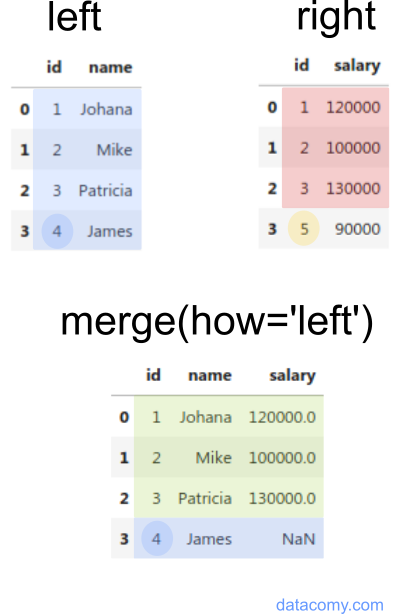

In [ ]:
inspect_df(merged)

In [ ]:
analysis_df = merged[
    ["Username", "FullName", "Q Type", "Answer", "Score", "Group"]
]

analysis_df.head()

💡 Instead of overwriting merged,
we create a new object called `analysis_df`.

This keeps our workflow transparent.

Raw → Clean → Merged → Analysis

# Step 3. Split by question type

### Workflow status
- ✅ Raw D2L CSV
- ✅ Inspect & clean
- ✅ Add group info (merge)
- 🔵 **Split by question type**

In this step, we:
- Separate multiple-choice questions from short-answer questions
- Prepare different analysis paths for different data types






---


Right now, `analysis_df` contains:

- MC questions

- WR questions

All mixed together.

We want to separate them into two dataframes for separate analysis

### 💭 Recall: What is a Boolean?

In [ ]:
analysis_df["Q Type"] == "MC"

`True` → this row is MC

`False` → this row is not MC

When filtering the rows, I want:

Rows marked `True` stay.
Rows marked `False` are hidden.

In [ ]:
# Split the question types
mc_df = analysis_df[analysis_df["Q Type"] == "MC"]
wr_df = analysis_df[analysis_df["Q Type"] == "WR"]

The outside `analysis_df[ ... ]` keeps only rows where the condition is True.

So the pattern is:

`df[df["column"] == value]`

In [ ]:
# Verify the result
mc_df["Q Type"].value_counts()

In [ ]:
wr_df["Q Type"].value_counts()

# Step 4A. Multiple-choice questions: group stats & visualization

### Workflow status
- ✅ Raw D2L CSV
- ✅ Inspect & clean
- ✅ Add group info (merge)
- ✅ Split by question type
  - 🔵 **MC → group stats → bar chart**
  - ⬜ Short answer → word freq → word cloud

In this step, we:
- Calculate simple statistics by group
- Create a basic bar chart to compare groups



Numeric data allows us to calculate statistics.

This is where we can begin to answer our research question:



> Does AI-assisted study improve vocabulary retention?

### 🟢 Step 1 – Check structure again



In [ ]:
# code goes here
mc_df.head()

❓:

What does one row represent?

One student?

Or one student answering one question?

🙋🏻‍♀️: one student answering one question.

So we have multiple rows per student.

### 🟢 Step 2 – Decide what statistic we want
Simplest statistic:

Mean score by group.

### 🟢 Step 3 – Group by condition

We use `groupby()` when we want to split data into groups, and apply a function to each group

In [ ]:
group_means = mc_df.groupby("Group")["Score"].mean()
group_means

Break it down:

`mc_df.groupby("Group")` → Divide rows into Group A, B, C.

`["Score"]` → Focus only on the Score column.

`.mean()` → Calculate the average for each group.



### 🟢 Step 4 – Create a simple bar chart



🎯 Before writing any plotting code,
let’s describe what we want in plain language.

We have:

- Average score by group

- Three groups (A, B, C)

We want:

- A bar chart

- X-axis: Group

- Y-axis: Average score

- Title: "Average Vocabulary Score by Group"


**🧠 An AI prompt example:**



> I have a DataFrame named "group_means" with two columns: Group and average Score.

> Create a simple bar chart comparing average score by group using matplotlib.

> Label the y-axis "Average Score" and add a title "Average Vocabulary Score by Group".

> Give me the python code for the plot.




Notice what we included:

- What data structure we have

- Which columns

- What type of chart

- What labels we want

In [ ]:
import matplotlib.pyplot as plt

group_means.plot(kind="bar", legend=False)
plt.ylabel("Average Score")
plt.title("Average Vocabulary Score by Group")
plt.show()

You do not need to memorize plotting syntax.

You only need to:

- Know what structure your data has.

- Know what comparison you want to make.

- Describe it precisely.



---

## 🚀 Challenge: Distribution of Total Scores

🟢 Goal

Look at the distribution of **total scores** within each **group**.

We want to see:

- How spread out the scores are

- Whether groups overlap

- Whether there are outliers

📊 We can use a **box plot**.
If we can add **individual points**, even better.

🟢 Steps:

Before plotting anything, we need to change the unit of analysis.

Right now:

`mc_df` → one row = one student answering one question

But we want:

**one row = one student total score**

So we need to:



1.   `mc_df` → Group by `Username` and `Group` & Calculate **total Score** per student
2.   Visualize the result







---



**🟢 AI Prompt fill-in template:**


> I have a pandas DataFrame called _______.

> Each row represents one student answering one question.

> First, I want to calculate each student's **total Score** grouped by _____ and _____.

> Then, create a box plot showing the distribution of total scores by Group.

> If possible, overlay individual data points.

> Use seaborn or matplotlib.



---



Let's pause for 5 min, and you can use any AI tool you feel comfortable to generate the code.

Once you get the result table, go ahead and post it in the Zoom chat.

In [ ]:
# Sample Code
# Step A: Aggregate to student level

student_totals = (
    mc_df
    .groupby(["Username", "Group"])["Score"]
    .sum()
    .reset_index()
)

student_totals.head()

Now each row represents one student

In [ ]:
# Step B: Boxplot + Individual Points

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

sns.boxplot(data=student_totals, x="Group", y="Score")
sns.stripplot(data=student_totals, x="Group", y="Score",
              color="black", alpha=0.5)

plt.ylabel("Total MC Score")
plt.title("Distribution of Total Vocabulary Scores by Group")
plt.show()

Now we’ve visualized the differences.
If we are doing research, we might ask:

Are these differences statistically significant?

Python can do that too.

In [ ]:
from scipy.stats import f_oneway

groups = [
    student_totals[student_totals["Group"] == g]["Score"]
    for g in student_totals["Group"].unique()
]

f_stat, p_value = f_oneway(*groups)

print("F statistic:", f_stat)
print("p-value:", p_value)

# Step 4B. Short-answer questions: text exploration (optional)

### Workflow status
- ✅ Raw D2L CSV
- ✅ Inspect & clean
- ✅ Add group info (merge)
- ✅ Split by question type
  - ✅ MC → group stats → bar chart
  - 🔵 **Short answer → word freq → word cloud**

In this step, we:
- Explore common words or phrases in open-ended responses
- Visualize themes using word frequency or a word cloud
- Assign sentiment labels to each answer.


*(Optional — skip if time is limited.)*

👉 The goal here is simply to see:

What kinds of things are possible with textual data.



### 🟢 Overview

So far, we worked with numeric data:

- We calculated averages.

- We grouped by condition.

- We created charts.

👉 Now we switch to open-ended responses.

What can we do with text?

- Count common words

- Extract common phrases (n-grams)

- Create a word cloud

- Assign simple sentiment labels


In [ ]:

wr_text = " ".join(wr_df["Answer"].dropna())

In [ ]:
from collections import Counter

words = wr_text.lower().split()
word_counts = Counter(words)

word_counts.most_common(10)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=600, height=300, background_color="white").generate(wr_text)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
words = wr_text.lower().split()

In [ ]:
from collections import Counter

bigrams = zip(words, words[1:])
bigram_counts = Counter(bigrams)

bigram_counts.most_common(10)

In [ ]:
from textblob import TextBlob


In [ ]:

def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity

    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

wr_df["Sentiment"] = wr_df["Answer"].apply(get_sentiment)

wr_df[["Answer", "Sentiment"]].head()

In [ ]:
wr_df[["Answer", "Sentiment"]]

In [ ]:
positive_words = ["helpful", "useful", "clear", "effective", "interesting", "improve"]
negative_words = ["confusing", "difficult", "dishonesty", "boring", "reduces", "concerned", "worry"]

def simple_sentiment(text):
    text = str(text).lower()

    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)

    if pos_count > neg_count:
        return "Positive"
    elif neg_count > pos_count:
        return "Negative"
    else:
        return "Neutral"

wr_df["Simple_Sentiment"] = wr_df["Answer"].apply(simple_sentiment)

wr_df[["Answer", "Simple_Sentiment"]].head()



---
# 🔁 What we did today

We walked through a complete data workflow:



1.   Imported raw data

2.   Inspected and cleaned it

3.   Merged multiple tables

4.   Split by data type

5.   Analyzed numeric data

6.   Explored textual data



# 🧠 What you learned

1. Understanding data structure

2. Thinking in workflows

3. Breaking problems into steps

4. Describing your analytical needs clearly

5. Using AI as a coding partner


# ⚛️ Vibe Coding

If you can:

- Explain what your dataset looks like

- Explain what transformation you need

- Explain what output you want

You can generate the code as you need.

# 🚀 Next step

Take your own dataset.

Try to:

- Inspect it

- Clean it

- Identify one question you want to answer

- Write a clear prompt describing your goal

Different datasets, same logic.

Filter → Transform → Aggregate → Visualize

# 🏁 Enjoy coding!